In [21]:
import torchvision
import torch
import torchvision.datasets as ds
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch import nn

In [22]:
mnist_train = ds.MNIST(root="./data", train=True, download=True)

In [23]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

In [24]:
mnist_train[0]
#28x28 Matrix
# image data is always represented in Matrix style
#pillow image format, which needs to be a tensor

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [25]:
mnist_train[0][0] #first image

In [26]:
import numpy as np
print(np.array(mnist_train[0][0]))
#we see a lot of background with 0 and then some other numbers which represent the pixels, where the number is

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [27]:
mnist_test = ds.MNIST(root="./data", train=False, download=True)

In [28]:
#normally manually you would use torch.tensor somehow for an individual image, but that would be very complicated
#    like first the image into a numpy arra and then into a tensor

In [29]:
mnist_train_tensor = ds.MNIST(root="./data", train=True, download=False, transform=ToTensor())
mnist_test_tensor = ds.MNIST(root="./data", train=False, download=False, transform=ToTensor())

In [30]:
mnist_train_tensor[0]
# I can see how the other values are transformed for X and how y is still the same, is also standardized (between 0-1), no longer till 256

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [31]:
# slicing is ot supported, thus we gonna use the DataLoader 

In [32]:
train_dataloader = DataLoader(mnist_train_tensor, batch_size=32, shuffle=True)
test_dataloader = DataLoader(mnist_test_tensor, batch_size=32, shuffle=False)

In [33]:
for x, y in train_dataloader:
    print(x, y)
    print(x.shape, y.shape)
    #y 32, 1 format used for columns, not here (proof need)
    break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [34]:
model = nn.Sequential(
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 1)
)

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for i in range(0, 10):
    loss_sum=0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784)) #28x28 reshapen bevor sie ins modell gehen, hier für beispielszwecke über ne schleife, normalerweise so nicht
        y = (y == 0).type(torch.float32).reshape((-1, 1))
        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()
        loss_sum+=loss.item()
  
    print(loss_sum)

69.70479884647648
30.494801807530166
18.905187091336302
12.452220377094818
10.035582215641114
7.026229988950405
6.044975065922273
4.332356403547152
3.8583583838631754
3.063021171019612


In [40]:
# with images also on test data it is a good idea to split data, because it is possible that all the images would
# not fit into the memory

model.eval()
with torch.no_grad():
    accurate_zero_preds = 0
    total = 0

    for X, y in test_dataloader:
        print(X.shape)
        print(y.shape)
        X = X.reshape(-1, 784)
        y = (y == 0).reshape((-1, 1))
        #here we need to apply sigmoid as it was during the trining in the BCE With logits loss
        # making training faster and smoother here for test, we have to do it manually
        outputs = nn.functional.sigmoid(model(X))
        correct_pred = ((outputs > 0.5) == y)
        total+=correct_pred.size(0)
        accurate_zero_preds+=correct_pred.type(torch.int).sum().item()
    print(accurate_zero_preds / total)


torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size

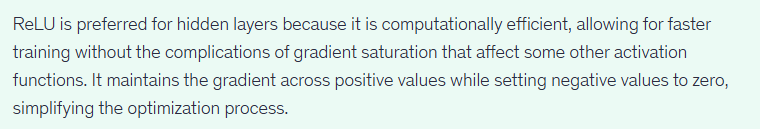